### Compilo

In [1]:
!cd .. && mkdir build
!cd ../build/ && rm -rf *
!cd ../build && cmake \
  -DPYTHON_EXECUTABLE="$(which python)" \
  -DCMAKE_BUILD_TYPE=Release ..
!cd ../build && make install

mkdir: cannot create directory ‘build’: File exists
-- The C compiler identification is GNU 10.3.0
-- The CXX compiler identification is GNU 10.3.0
-- Detecting C compiler ABI info
-- Detecting C compiler ABI info - done
-- Check for working C compiler: /usr/bin/cc - skipped
-- Detecting C compile features
-- Detecting C compile features - done
-- Detecting CXX compiler ABI info
-- Detecting CXX compiler ABI info - done
-- Check for working CXX compiler: /usr/bin/c++ - skipped
-- Detecting CXX compile features
-- Detecting CXX compile features - done
Release mode
-- Found PythonInterp: /home/andres/anaconda3/envs/tp2/bin/python (found version "3.6.5") 
-- Found PythonLibs: /home/andres/anaconda3/envs/tp2/lib/libpython3.6m.so
-- pybind11 v2.2.4
-- Performing Test HAS_FLTO
-- Performing Test HAS_FLTO - Success
-- LTO enabled
CMAKE_INSTALL_PREFIX=/home/andres/Desktop/tp2
-- Configuring done
-- Generating done
-- Build files have been written to: /home/andres/Desktop/tp2/build
Scanning dep

In [20]:
# Verifico la correcta instalación. Si no falla el import está OK
!pwd
!python --version
import metnum

/home/sebasbocaccio/Desktop/FACU/Metodos/tp2-metodos/tp2/notebooks
Python 3.6.5 :: Anaconda, Inc.


### Cargo los datos

In [35]:
%load_ext autoreload
%autoreload 2
import pandas as pd

df_train = pd.read_csv("../data/train.csv")

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [73]:
df_train[:10]

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Reduzco el dataset

In [36]:
df_train = df_train[:1000]

In [23]:
# Uso values para mandar todo a arrays de numpy
X = df_train[df_train.columns[1:]].values
y = df_train["label"].values.reshape(-1, 1)

X.shape, y.shape

((1000, 784), (1000, 1))

In [37]:
import matplotlib.pyplot as plt

num = 1917

print(f"Supuestamente es un {int(y[num])}")

img = X[num].reshape(28, 28)
plt.imshow(img, cmap="Greys")

IndexError: index 1917 is out of bounds for axis 0 with size 1000

### Aplico PCA

In [38]:
pca = metnum.PCA(1)
Xt = pca.transform(X)
print(Xt)

[[-1.99136323e+01]
 [ 5.49160757e+01]
 [-2.66083584e+01]
 [-5.63064045e+00]
 [ 6.20111492e+01]
 [ 1.28914914e+01]
 [-2.31049423e+01]
 [-4.95642189e+00]
 [ 6.90315310e+00]
 [ 9.85114056e+00]
 [ 3.67399341e+00]
 [-1.36314320e+01]
 [-2.91035029e+01]
 [-1.74705436e+00]
 [ 1.49662492e+01]
 [-2.95098367e+01]
 [-6.25796934e-01]
 [ 3.01914733e+01]
 [-2.17157293e+01]
 [ 3.04993658e+01]
 [-9.51307476e+00]
 [ 6.77807539e+00]
 [ 2.51587481e-01]
 [ 4.27712373e+01]
 [-9.83102029e+00]
 [ 7.88502903e+00]
 [-7.28144921e-01]
 [-2.17292579e+01]
 [-1.95361670e+01]
 [-4.99551273e+00]
 [-1.18604901e+01]
 [-6.65882449e+00]
 [ 1.14007118e+01]
 [-8.48624159e+00]
 [-9.86894408e+00]
 [-1.97922352e+01]
 [-1.15172776e+01]
 [-2.56316072e+01]
 [-2.76362441e+01]
 [-9.11254147e+00]
 [-6.03783647e+00]
 [-2.66584022e+01]
 [ 7.84472215e+00]
 [ 2.33653922e+00]
 [-1.31386747e+01]
 [ 1.62763000e+00]
 [-9.97827655e+00]
 [-1.69740833e+01]
 [-1.61348199e+01]
 [ 3.48844190e+00]
 [-1.73831048e+01]
 [ 2.71455822e+01]
 [-2.7008019

In [ ]:
Xt

### Verifico que las dimensiones estén bien

In [7]:
X.shape

(1000, 784)

In [8]:
Xt.shape

(1000, 25)

### Grafico las componentes principales para verificar que los autovectores estén bien calculados

#### Primer componente principal

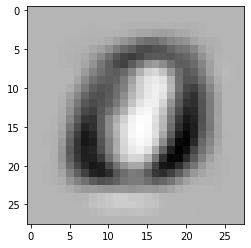

In [57]:
cp = pca.componentesPrincipales()
cp = cp.transpose()
img = cp[0].reshape(28, 28)
plt.imshow(img, cmap="Greys")

#### Segunda componente principal

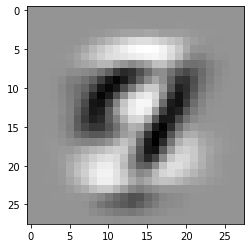

In [58]:
img = cp[1].reshape(28, 28)
plt.imshow(img, cmap="Greys")

#### Tercer componente principal

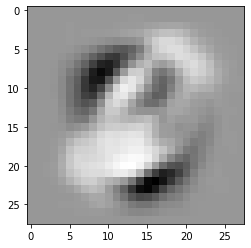

In [59]:
img = cp[2].reshape(28, 28)
plt.imshow(img, cmap="Greys")

### Aplico kNN

#### Pruebo primero con los datos sin transformar

In [25]:

X_train, y_train = X[:limit], y[:limit]
X_val, y_val = X[limit:], y[limit:]

assert len(X_train) == len(y_train)
assert len(X_val) == len(y_val)

print(f"Ahora tengo {len(X_train)} instancias de entrenamiento y {len(X_val)} de validación")

Ahora tengo 800 instancias de entrenamiento y 200 de validación


In [26]:
from sklearn.neighbors import KNeighborsClassifier

# Acá pueden cambiar el clasificador nuestro por el de sklearn!


#clf = KNeighborsClassifier(10)

clf.fit(X_train, y_train)

In [28]:
%%time
clf = metnum.KNNClassifier(10)

clf.fit(X_train, y_train)
y_pred = clf.predict(X_val)

acc = accuracy_score(y_val, y_pred)
print("Accuracy: {}".format(acc))

Accuracy: 0.82
CPU times: user 727 ms, sys: 3.93 ms, total: 731 ms
Wall time: 731 ms


#### Ahora uso kNN con PCA

In [39]:
limit = int(0.8 * X.shape[0]) 
Xt_train, y_train = Xt[:limit], y[:limit]
Xt_val,y_val = Xt[limit:],y[limit:]
clf = metnum.KNNClassifier(10)
clf.fit(Xt_train, y_train)

In [40]:
%%time
from sklearn.metrics import accuracy_score
y_pred = clf.predict(Xt_val)

acc = accuracy_score(y_val, y_pred)
print("Accuracy: {}".format(acc))

Accuracy: 0.23
CPU times: user 25.7 ms, sys: 26 µs, total: 25.7 ms
Wall time: 26.5 ms
